In [1]:
from frappy import d2
from scipy.integrate import odeint
import numpy as np
import time
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
def lorenz_system(current_state, t):
    x, y, z = current_state
    sigma = 10.
    rho = 28.
    beta = 8./3.
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    
    return [dx_dt, dy_dt, dz_dt]

In [3]:
initial_state = [0.1, 0, 0]
start_time = 0
end_time = 200
time_points = np.linspace(start_time, end_time, end_time*100)

In [4]:
xyz = odeint(lorenz_system, initial_state, time_points)

Text(0, 0.5, 'y')

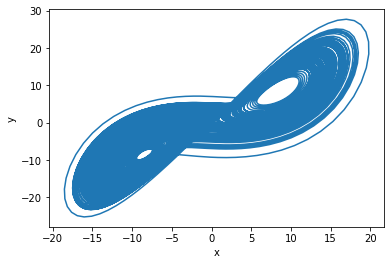

In [5]:
plt.plot(xyz[:,0],xyz[:,1])
plt.xlabel('x')
plt.ylabel('y')

## Original XY Plane

In [8]:
Emb_vecs=d2.embedding(xyz[:,0],3)

Text(0, 0.5, 'x(t+T)')

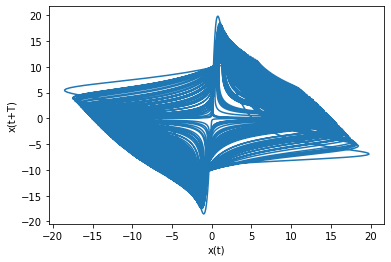

In [19]:
plt.plot(Emb_vecs[:,0],Emb_vecs[:,1])
plt.xlabel('x(t)')
plt.ylabel('x(t+T)')

## Embedded XY Plane

In [12]:
ys,errs=d2.find_d2(xyz[:,0])

1 1.0153686403828828 0.00495497336356651
2 1.676191510618643 0.01106258777922012
3 1.922156035265457 0.004690820160412844
4 1.9631283639514658 0.007604423411932583
5 1.9359877252729163 0.009069859394338726
6 1.9462755053220975 0.01428322468795763
7 2.0363333306545055 0.012743328987392883
8 2.1004995953106254 0.019959516664353777
9 2.2480420079340435 0.03776349376922313
10 2.3357165746696507 0.04916114222676481


In [13]:
Ms=np.arange(len(ys))
Ms=Ms+1

Text(0.5, 0, 'M')

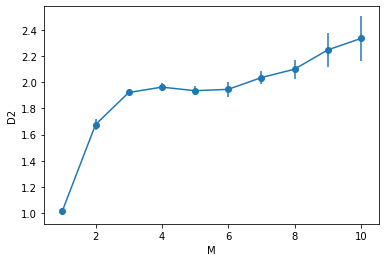

In [14]:
plt.errorbar(Ms,ys,yerr=errs)
plt.scatter(Ms,ys)
plt.ylabel('D2')
plt.xlabel('M')

In [15]:
d2sat,em,chi2=d2.find_d2s(Ms,ys,errs)

In [16]:
print(d2sat,em,chi2, 'are Sat D2, Embedding dim and reduced chi2')

1.9535055902546221 3 2.63185230780471 are Sat D2, Embedding dim and reduced chi2


In [17]:
o1=d2.check_sat(Ms,ys,errs)
print(o1)

3 1.9535055902546221
2.63185230780471 92.84706829517192
Saturated D2 fit is better than linear fit
1.9535055902546221
